 # 1 
 Можно ли отобрать наиболее значимые признаки с помощью PCA? Ответ объясните.

да можно, масштабируем признаки и по матрице весов смотрим где веса меньше значит и признак меньше значимый

 # 2(*)
 Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd(). Применить к данным на уроке и сравнить ответы.

In [155]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

сначала напишем реализацию PCA которая была на уроке

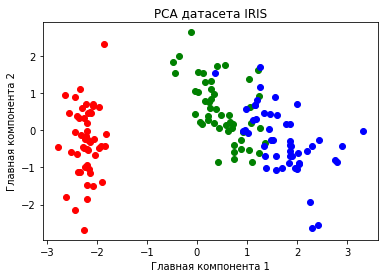

In [156]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data

# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по признаку
means = X_.mean(axis=0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for j in range(cols):
    for i in range(rows):
        X_[i, j] /= std[j]

# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)
Z.shape

plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

А таперь напишем реализацию PCA с помощью разложения матрицы

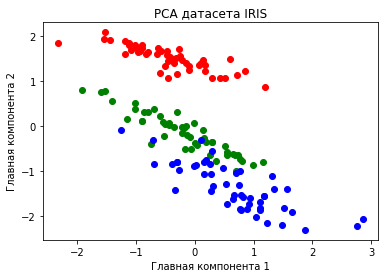

In [157]:
#сингулярное разложение матрицы признаков
U, D, V = np.linalg.svd(X_)

#формируем список весов
W_T = V.T.tolist()
W_T.sort(key=lambda x: sum(x), reverse=True)
W = np.array(W_T).T

#убираем столбец с последними весами
W = W[:-1]

# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W.T)

plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

я думаю что второй способ лючше снизил размерность данных чем первый

# 3(*)
Обучить любую модель классификации (из рассмотренных в курсе) на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

сначала импортируем модель кнн

In [186]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in k_neighbours:
            w = 1/i
            i += 1
            classes[d[1]] += w # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

импортируем данные

In [187]:
X, y = load_iris(return_X_y=True)

# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по признаку
means = X_.mean(axis=0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for j in range(cols):
    for i in range(rows):
        X_[i, j] /= std[j]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_, y, test_size=0.2, random_state=1)

обучим нашу модель,добавим в переменную err список ошибок по предсказаниям без снижения размерности

In [188]:
k = 10
err_0 = []
for el in range(1, k + 1):
    y_pred = knn(X_train, y_train, X_test, el)
    err_0.append(accuracy(y_pred, y_test))

применим РСА

In [189]:
#сингулярное разложение матрицы признаков
U, D, V = np.linalg.svd(X_)

#формируем список весов
W_T = V.T.tolist()
W_T.sort(key=lambda x: sum(x), reverse=True)
W = np.array(W_T).T

#убираем столбец с последними весами
W = W[:-1]

# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W.T)

рабзиваем выборку

In [190]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Z, y, test_size=0.2, random_state=1)

обучаем модельку

In [198]:
k = 10
err_1 = []
for el in range(1, k + 1):
    y_pred = knn(X_train, y_train, X_test, el)
    err_1.append(accuracy(y_pred, y_test))

строим график

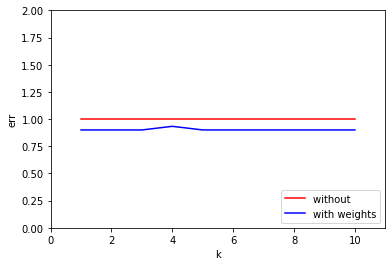

In [200]:
k = [el for el in range(1, k + 1)]
plt.xlabel('k')
plt.ylabel('err')
plt.xlim(0, 11)
plt.ylim(0, 2)
plt.plot(k, err_0, label='without PCA ',color='r')
plt.plot(k, err_1, label='with PCA',color='b')

plt.legend(loc='lower right')
plt.show()

в данном случае мы видим что модель где мы снижали размерность идеально классифицировала данные